In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [67]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import os
import uuid

In [6]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [5]:
cd '/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic'

/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic


In [8]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [9]:
POS_PATH

'data/positive'

##For data Collection purpose

In [12]:
# # Move LFW Images to the following repository data/negative
# for directory in os.listdir('lfw'):
#     for file in os.listdir(os.path.join('lfw', directory)):
#         EX_PATH = os.path.join('lfw', directory, file)
#         NEW_PATH = os.path.join(NEG_PATH, file)
#         os.replace(EX_PATH, NEW_PATH)

In [13]:
# Import uuid library to generate unique image names
# import uuid

In [14]:
# os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

In [15]:
# # Establish a connection to the webcam
# cap = cv2.VideoCapture(0)
# while cap.isOpened(): 
#     ret, frame = cap.read()
   
#     # Cut down frame to 250x250px
#     frame = frame[120:120+250,200:200+250, :]
    
#     # Collect anchors 
#     if cv2.waitKey(1) & 0XFF == ord('a'):
#         # Create the unique file path 
#         imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
#         # Write out anchor image
#         cv2.imwrite(imgname, frame)
    
#     # Collect positives
#     if cv2.waitKey(1) & 0XFF == ord('p'):
#         # Create the unique file path 
#         imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
#         # Write out positive image
#         cv2.imwrite(imgname, frame)
    
#     # Show image back to screen
#     cv2.imshow('Image Collection', frame)
    
#     # Breaking gracefully
#     if cv2.waitKey(1) & 0XFF == ord('q'):
#         break
        
# # Release the webcam
# cap.release()
# # Close the image show frame
# cv2.destroyAllWindows()

In [16]:
# def data_aug(img):
#     data = []
#     for i in range(9):
#         img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
#         img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
#         # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
#         img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
#         data.append(img)
    
#     return data

In [18]:
# img_path = os.path.join(ANC_PATH, '924e839c-135f-11ec-b54e-a0cec8d2d278.jpg')
# img = cv2.imread(img_path)
# augmented_images = data_aug(img)

# for image in augmented_images:
#     cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [19]:
# for file_name in os.listdir(os.path.join(POS_PATH)):
#     img_path = os.path.join(POS_PATH, file_name)
#     img = cv2.imread(img_path)
#     augmented_images = data_aug(img) 
    
#     for image in augmented_images:
#         cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

##Training

In [20]:
anc_path = '/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/anchor'
pos_path = '/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/positive'
neg_path = '/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/negative'

In [21]:
os.getcwd()

'/content'

In [22]:
anchor = tf.data.Dataset.list_files('/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/anchor'+'/*.jpg').take(3000)
positive = tf.data.Dataset.list_files('/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/positive'+'/*.jpg').take(3000)
negative = tf.data.Dataset.list_files('/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/negative'+'/*.jpg').take(3000)

In [23]:
dir_test = anchor.as_numpy_iterator()

In [24]:
print(dir_test.next())

b'/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/anchor/056afb25-ae8c-11ec-9219-ace2d3687f38.jpg'


In [25]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [27]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [39]:
samples = data.as_numpy_iterator()
exampple = samples.next()
exampple

(b'/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/anchor/0d43ac2c-ae8c-11ec-9e90-ace2d3687f38.jpg',
 b'/content/gdrive/MyDrive/Job/face_recognizer_assignment/nic/data/positive/1711cec8-ae8f-11ec-8c19-0242ac1c0002.jpg',
 1.0)

In [29]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [40]:
res = preprocess_twin(*exampple)

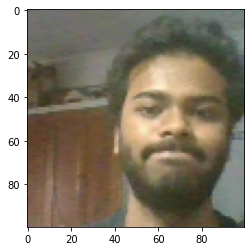

In [41]:
plt.imshow(res[0])

In [42]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [43]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [44]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [45]:
round(len(data)*.7)

686

In [46]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [47]:
embedding = make_embedding()
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [48]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [49]:
l1 = L1Dist()
#l1(anchor_embedding, validation_embedding)

In [50]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [51]:
siamese_model = make_siamese_model()
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [52]:
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001


In [54]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)
manager = tf.train.CheckpointManager(ckpt, './tf_ckpts', max_to_keep=3)

In [63]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [64]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [65]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [66]:
EPOCHS = 50

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/500
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
43/43 [==============================] - 525s 1s/step
0.0711672 0.7535014 1.0

 Epoch 2/500
43/43 [==============================] - 46s 1s/step
0.0020223379 0.9877301 0.9877301

 Epoch 3/500
43/43 [==============================] - 47s 1s/step
0.0012368661 0.99715906 1.0

 Epoch 4/500
43/43 [==============================] - 45s 1s/step
0.0010802895 1.0 1.0

 Epoch 5/500
43/43 [==============================] - 46s 1s/step
0.0005421682 1.0 1.0

 Epoch 6/500
43/43 [==============================] - 46s 1s/step
0.022434464 1.0 1.0

 Epoch 7/500
43/43 [==============================] - 45s 1s/step
0.009069897 1.0 1.0

 Epoch 8/500
43/43 [==============================] - 48s 1s/step
3.432327e-05 1.0 1.0

 Epoch 9/500
43/43 [==============================] - 45s 1s/step
0.10575259 0.9446064 0.9908257

 Epoch 10/500
43/43 [=

##Evolution

In [1]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [55]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [56]:
y_hat = siamese_model.predict([test_input, test_val])

In [57]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1]

In [58]:
y_true

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [59]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.5

In [60]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.45454547

In [61]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

0.5205479 0.36363637


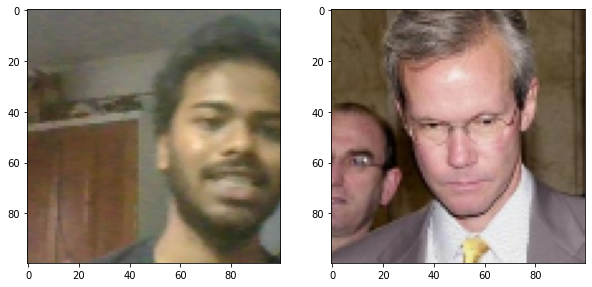

In [62]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

### Rest of the code is for **implementation purpose**

In [ ]:
# Import standard dependencies
import cv2
import os
import numpy as np

from tensorflow.keras.layers import Layer
import tensorflow as tf
import uuid

def face_crop(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,4)
    face = image
    face_dected = False
    for (x,y,w,h) in faces:
        face_dected = True
        face = image[y:y+h,x:x+w]
        face = cv2.resize(face, (250,250))
        cv2.imshow("face",face)

    return face_dected,face

def preprocess(file_path):
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100, 100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img


# Siamese L1 Distance class
class L1Dist(Layer):

    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)




def verify(model, detection_threshold, verification_threshold):
    input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
    #print("Before Outer Loop")
    for folder_name in os.listdir("application_data"):
        if folder_name == "input_image":
            continue
        
    # Build results array
    #Finiding total employee count
    #Walking through each directory and checking image of that directory to input image
        results = []
        #print("Before Inner Loop")
        for image in os.listdir(os.path.join('application_data', folder_name)):
            validation_img = preprocess(os.path.join('application_data', folder_name, image))

            # Make Predictions
            result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
            results.append(result)
        # Detection Threshold: Metric above which a prediciton is considered positive
        detection = np.sum(np.array(results) > detection_threshold)
        # Verification Threshold: Proportion of positive predictions / total positive samples
        verification = detection / len(os.listdir(os.path.join('application_data', folder_name)))
        # print("Checking to verify")

        if verification > verification_threshold:
            verified = True
            print("Returning values")
            print("Folder name: ", folder_name)
            print("result : ", results)
            return results, verified, folder_name
        print("Folder name: ",folder_name)
        print("result : ",results)


    return results, False, "Not found"


def add_person(name_id):

    #path to main folder + individual person photo folder
    path = 'D:\\path\\to\\main\\folder\\' + name_id  #path to main folder + individual person photo folder
    print(path)
    if(os.path.isdir(path)):
        print("alreay in database")
        return
    else:
        os.makedirs(path)


    # Establish a connection to the webcam
    cap = cv2.VideoCapture(0)
    i=1
    while cap.isOpened():
        ret, frame = cap.read()
        if(i>50):
            break

        cv2.imshow('Image Collection', frame)
        # Cut down frame to 250x250px
        face_detect, frame = face_crop(frame)
        print(face_detect)
        # Collect anchors
        if cv2.waitKey(1) & 0XFF == ord('a'):
            if(face_detect):
                # Create the unique file path
                imgname = os.path.join(path, '{}.jpg'.format(uuid.uuid1()))
                # Write out anchor image
                cv2.imwrite(imgname, frame)
                i = i + 1

        # Breaking gracefully
        if cv2.waitKey(1) & 0XFF == ord('q'):
            break

    # Release the webcam
    cap.release()
    # Close the image show frame
    cv2.destroyAllWindows()

def verify_a_person():
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()
        cv2.imshow('Verification', frame)
        face_detect,frame = face_crop(frame)
        if(not face_detect):
            continue


        # Verification trigger
        if cv2.waitKey(10) & 0xFF == ord('v'):

            cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
            # Run verification
            results, verified, folder_name = verify(siamese_model, 0.4, 0.4)
            print(verified)
            # print(results)
            print(folder_name)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# Reload model
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5',
                                           custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy': tf.losses.BinaryCrossentropy})

while(1):

    choice = input("What do you want to do : \n1.Add a new person\n2.Verify person\n3.Quit\n")
    global face_cascade

    #path to haar cascade file
    haar_file = 'D:\\path\\to\\haar_cascade_file\\haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(haar_file)
    if(choice == '1'):
        name_id = input("Enter person's identification: ")
        add_person(name_id)
    elif(choice == '2'):
        verify_a_person()
    else:
        print(choice)
        print("Thankyou")
        break
